In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 西瓜书的数据集
编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜  
1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.46,是  
2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是  
3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是  
4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是  
5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是  
6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是  
7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是  
8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是  
9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否  
10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,否  
11,浅白,硬挺,清脆,模糊,平坦,硬滑,0.245,0.057,否  
12,浅白,蜷缩,浊响,模糊,平坦,软粘,0.343,0.099,否  
13,青绿,稍蜷,浊响,稍糊,凹陷,硬滑,0.639,0.161,否  
14,浅白,稍蜷,沉闷,稍糊,凹陷,硬滑,0.657,0.198,否  
15,乌黑,稍蜷,浊响,清晰,稍凹,软粘,0.36,0.37,否  
16,浅白,蜷缩,浊响,模糊,平坦,硬滑,0.593,0.042,否  
17,青绿,蜷缩,沉闷,稍糊,稍凹,硬滑,0.719,0.103,否

In [2]:
data = np.array([
[1 ,  1 ,  1,   1,   1 ,  1 ,  1,   0.697 ,  0.46 ,   1],
[2 ,  2 ,  1,   2,   1 ,  1 ,  1,   0.774 ,  0.376,   1],
[3 ,  2 ,  1,   1,   1 ,  1 ,  1,   0.634 ,  0.264,   1],
[4 ,  1 ,  1,   2,   1 ,  1 ,  1,   0.608 ,  0.318,   1],
[5 ,  3 ,  1,   1,   1 ,  1 ,  1,   0.556 ,  0.215,   1],
[6 ,  1 ,  2,   1,   1 ,  2 ,  2,   0.403 ,  0.237,   1],
[7 ,  2 ,  2,   1,   2 ,  2 ,  2,   0.481 ,  0.149,   1],
[8 ,  2 ,  2,   1,   1 ,  2 ,  1,   0.437 ,  0.211,   1],
[9 ,  2 ,  2,   2,   2 ,  2 ,  1,   0.666 ,  0.091,   0],
[10,  1 ,  3,   3,   1 ,  3 ,  2,   0.243 ,  0.267,   0],
[11,  3 ,  3,   3,   3 ,  3 ,  1,   0.245 ,  0.057,   0],
[12 , 3  , 1 ,  1 ,  3  , 3  , 2 ,  0.343 , 0.099 ,  0],
[13 , 1  , 2 ,  1 ,  2  , 1  , 1 ,  0.639 , 0.161 ,  0],
[14 , 3  , 2 ,  2 ,  2  , 1  , 1 ,  0.657 , 0.198 ,  0],
[15 , 2  , 2 ,  1 ,  1  , 2  , 2 ,  0.36, 0.37  ,  0],
[16 , 3  , 1 ,  1 ,  3  , 3  , 1 ,  0.593  , 0.042 ,  0],
[17 , 1  , 1 ,  2 ,  2  , 2  , 1 ,  0.719  , 0.103 ,  0]
])

### 数据较少 而且主要是为了理解梯度下降算法故不进行样本集划分了

In [3]:
X_train = data[:,1:-1]
y_train = data[:,-1]

### 定义损失函数

In [4]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')

### 损失函数的导数

In [5]:
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

### 梯度下降算法

In [6]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    #X_b为增广矩阵  第一列全是一  y = theta *X_b
    theta = initial_theta
    cur_iter = 0
    list_iter = []
    list_x_100 =[]
    while cur_iter < n_iters:
        if cur_iter%100==0:
            list_iter.append(J(theta, X_b, y))
            list_x_100.append(cur_iter)
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        cur_iter += 1
    #绘制loss曲线
    plt.plot(list_x_100,list_iter)
    plt.show()
    return theta

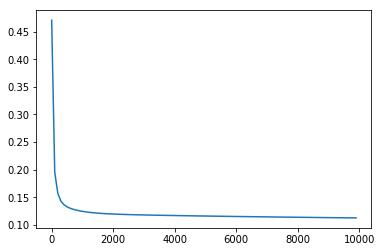

In [7]:
# 将X矩阵的增加一列全是一的同维度矩阵 这样方便算法的向量化
X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
# 将theta全都初始化为theta进行梯度下降
initial_theta = np.zeros(X_b.shape[1])
# eta代表学习速率  n_iters 代表最大迭代次数       eta过大 会导致发散！！！ 

final_theta = gradient_descent(X_b, y_train, initial_theta=initial_theta, eta=0.01,n_iters=10000)

### final即为通过梯度下降法 得到的最小化代价函数 

In [8]:
final_theta

array([ 1.35505478,  0.08438326, -0.11347241, -0.13071161, -0.40394935,
       -0.02188142, -0.02455957,  0.0790359 ,  0.14406908])

In [9]:
w = final_theta[1:]

In [10]:
b = final_theta[:1]

In [11]:
w

array([ 0.08438326, -0.11347241, -0.13071161, -0.40394935, -0.02188142,
       -0.02455957,  0.0790359 ,  0.14406908])

In [12]:
b

array([ 1.35505478])